In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import copy
import re
from PIL import Image
import joblib

In [2]:
from tqdm.notebook import tqdm

tqdm.pandas()

In [3]:
from py.utils import verifyDir

In [4]:
CITY_TO_EVALUATE = "Rio De Janeiro"
METRIC_TO_EVALUATE = "safety"

In [5]:
DATA_PATH = "data/PlacePulse_2/"
QSCORE_PATH = f"{DATA_PATH}/Qscores/all/Summaries/"

MAIN_OUT_PATH = "outputs/"
IMAGES_PATH = f"{DATA_PATH}/images/"

In [6]:
verifyDir(f"{MAIN_OUT_PATH}/static/")

### Drawing features presence

In [7]:
pp_df = pd.read_csv(f"{QSCORE_PATH}summary_scores.csv", low_memory=False)
pp_df.rename(columns={"ID": "image_file_name", f"{METRIC_TO_EVALUATE}": "perception"}, inplace=True)
pp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111390 entries, 0 to 111389
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   image_file_name  111390 non-null  object 
 1   wealthy          111390 non-null  float64
 2   depressing       111390 non-null  float64
 3   perception       111390 non-null  float64
 4   lively           111390 non-null  float64
 5   boring           111390 non-null  float64
 6   beautiful        111390 non-null  float64
dtypes: float64(6), object(1)
memory usage: 5.9+ MB


In [8]:
pp_df

,image_file_name,wealthy,depressing,perception,lively,boring,beautiful
0,513d2dbefdc9f03587002515,7.518519,2.166667,5.714286,4.554279,4.944444,6.296296
1,514145e8fdc9f049260066b8,4.875000,3.333333,7.030864,7.055556,3.472222,5.902116
2,513da066fdc9f0358700897b,3.533333,7.500000,7.280702,4.796296,0.000000,2.583333
3,5141355bfdc9f049260049a4,5.000000,4.259259,3.333333,6.126182,0.000000,8.498016
4,50f5eb17fdc9f065f0007f52,7.129630,6.388889,4.900771,7.253086,1.333333,3.246914
...,...,...,...,...,...,...,...
111385,51409b0dfdc9f04926001007,0.000000,0.000000,2.280702,6.354402,3.333333,2.243056
111386,5140c8c2fdc9f0492600232b,0.000000,0.000000,6.666667,1.756494,6.666667,4.777778
111387,513d6e00fdc9f03587005241,0.000000,0.000000,1.764706,5.157315,3.333333,5.222222
111388,513d9c9ffdc9f03587007de2,0.000000,0.000000,3.333333,5.103896,0.000000,4.378968


In [9]:
segment_city_df = pd.read_csv(f"{MAIN_OUT_PATH}static/objects_deeplab_xception.csv", sep=";", low_memory=False)
df_ = segment_city_df.loc[:, (segment_city_df != 0).any(axis=0)].copy()
df_["city"] = df_["image_file_name"].apply(lambda x: re.sub(r"([A-Z])", r" \1", x.split("_")[3]).strip())
df_["image_path"] = df_.apply(lambda row: f"{IMAGES_PATH}/{row['city']}/{row['image_file_name']}.JPG", axis=1)
df_["image_file_name"] = df_["image_file_name"].apply(lambda x: x.split("_")[2])
df_

,image_file_name,wall,building,sky,floor,tree,ceiling,road,bed,windowpane,...,plate,monitor,bulletin,shower,radiator,glass,clock,flag,city,image_path
0,513cc058fdc9f0358700137e,0.000000,4.187520,43.906657,0.0,5.482992,0.0,28.821309,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Houston,data/PlacePulse_2//images//Houston/29.740200_-...
1,513cc646fdc9f03587001930,0.000000,0.015767,31.339518,0.0,23.216248,0.0,34.255981,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Houston,data/PlacePulse_2//images//Houston/29.658276_-...
2,513d35bffdc9f03587002b1e,0.000000,4.181417,42.042542,0.0,7.662964,0.0,25.940959,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Houston,data/PlacePulse_2//images//Houston/29.660180_-...
3,513cc072fdc9f0358700139b,0.000000,1.689148,43.962606,0.0,6.894430,0.0,24.218750,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Houston,data/PlacePulse_2//images//Houston/29.660599_-...
4,513cc0eafdc9f03587001413,0.000000,0.000000,48.340352,0.0,2.666219,0.0,37.083435,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Houston,data/PlacePulse_2//images//Houston/29.661336_-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110983,5140b899fdc9f04926001ca5,0.000000,0.699870,42.807007,0.0,10.089620,0.0,14.684041,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb,data/PlacePulse_2//images//Zagreb/45.843234_16...
110984,5140b75efdc9f049260019a9,0.000000,5.694580,29.054769,0.0,14.404806,0.0,10.788472,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb,data/PlacePulse_2//images//Zagreb/45.844200_16...
110985,5140b909fdc9f04926001d7d,0.348918,9.884135,34.589640,0.0,12.540181,0.0,16.451518,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb,data/PlacePulse_2//images//Zagreb/45.844303_16...
110986,5140b8b6fdc9f04926001cdc,0.436910,20.867920,31.451925,0.0,9.117635,0.0,3.922526,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb,data/PlacePulse_2//images//Zagreb/45.844791_16...


In [10]:
data_df = pd.merge(df_, pp_df[["image_file_name", "perception"]].copy(), on=["image_file_name"], how="left")
data_df["label"] = data_df["perception"].apply(lambda x: 2 if x>=6.0 else 1 if x>=4.0 else 0)
data_df

,image_file_name,wall,building,sky,floor,tree,ceiling,road,bed,windowpane,...,bulletin,shower,radiator,glass,clock,flag,city,image_path,perception,label
0,513cc058fdc9f0358700137e,0.000000,4.187520,43.906657,0.0,5.482992,0.0,28.821309,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Houston,data/PlacePulse_2//images//Houston/29.740200_-...,2.520084,0
1,513cc646fdc9f03587001930,0.000000,0.015767,31.339518,0.0,23.216248,0.0,34.255981,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Houston,data/PlacePulse_2//images//Houston/29.658276_-...,3.333333,0
2,513d35bffdc9f03587002b1e,0.000000,4.181417,42.042542,0.0,7.662964,0.0,25.940959,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Houston,data/PlacePulse_2//images//Houston/29.660180_-...,3.333333,0
3,513cc072fdc9f0358700139b,0.000000,1.689148,43.962606,0.0,6.894430,0.0,24.218750,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Houston,data/PlacePulse_2//images//Houston/29.660599_-...,5.634921,1
4,513cc0eafdc9f03587001413,0.000000,0.000000,48.340352,0.0,2.666219,0.0,37.083435,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Houston,data/PlacePulse_2//images//Houston/29.661336_-...,4.811105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110983,5140b899fdc9f04926001ca5,0.000000,0.699870,42.807007,0.0,10.089620,0.0,14.684041,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb,data/PlacePulse_2//images//Zagreb/45.843234_16...,4.373219,1
110984,5140b75efdc9f049260019a9,0.000000,5.694580,29.054769,0.0,14.404806,0.0,10.788472,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb,data/PlacePulse_2//images//Zagreb/45.844200_16...,3.333333,0
110985,5140b909fdc9f04926001d7d,0.348918,9.884135,34.589640,0.0,12.540181,0.0,16.451518,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb,data/PlacePulse_2//images//Zagreb/45.844303_16...,5.017316,1
110986,5140b8b6fdc9f04926001cdc,0.436910,20.867920,31.451925,0.0,9.117635,0.0,3.922526,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb,data/PlacePulse_2//images//Zagreb/45.844791_16...,5.211386,1


In [11]:
#city_df = data_df[data_df["city"]==CITY_TO_EVALUATE].copy()
city_df = data_df.copy()
city_df

,image_file_name,wall,building,sky,floor,tree,ceiling,road,bed,windowpane,...,bulletin,shower,radiator,glass,clock,flag,city,image_path,perception,label
0,513cc058fdc9f0358700137e,0.000000,4.187520,43.906657,0.0,5.482992,0.0,28.821309,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Houston,data/PlacePulse_2//images//Houston/29.740200_-...,2.520084,0
1,513cc646fdc9f03587001930,0.000000,0.015767,31.339518,0.0,23.216248,0.0,34.255981,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Houston,data/PlacePulse_2//images//Houston/29.658276_-...,3.333333,0
2,513d35bffdc9f03587002b1e,0.000000,4.181417,42.042542,0.0,7.662964,0.0,25.940959,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Houston,data/PlacePulse_2//images//Houston/29.660180_-...,3.333333,0
3,513cc072fdc9f0358700139b,0.000000,1.689148,43.962606,0.0,6.894430,0.0,24.218750,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Houston,data/PlacePulse_2//images//Houston/29.660599_-...,5.634921,1
4,513cc0eafdc9f03587001413,0.000000,0.000000,48.340352,0.0,2.666219,0.0,37.083435,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Houston,data/PlacePulse_2//images//Houston/29.661336_-...,4.811105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110983,5140b899fdc9f04926001ca5,0.000000,0.699870,42.807007,0.0,10.089620,0.0,14.684041,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb,data/PlacePulse_2//images//Zagreb/45.843234_16...,4.373219,1
110984,5140b75efdc9f049260019a9,0.000000,5.694580,29.054769,0.0,14.404806,0.0,10.788472,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb,data/PlacePulse_2//images//Zagreb/45.844200_16...,3.333333,0
110985,5140b909fdc9f04926001d7d,0.348918,9.884135,34.589640,0.0,12.540181,0.0,16.451518,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb,data/PlacePulse_2//images//Zagreb/45.844303_16...,5.017316,1
110986,5140b8b6fdc9f04926001cdc,0.436910,20.867920,31.451925,0.0,9.117635,0.0,3.922526,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Zagreb,data/PlacePulse_2//images//Zagreb/45.844791_16...,5.211386,1


In [12]:
city_df["label"].value_counts()

label
1    67824
0    30004
2    13160
Name: count, dtype: int64

In [13]:
# Total
features_df = city_df.iloc[:, 1:-4].copy()
features_df = features_df[np.sort(features_df.columns)]
features_df[features_df > 0] = 1

In [14]:
features_df.sum()

airplane       396.0
animal          86.0
apparel        110.0
arcade          18.0
armchair        48.0
               ...  
wardrobe        13.0
washer         126.0
water         2908.0
waterfall       38.0
windowpane    1142.0
Length: 149, dtype: float64

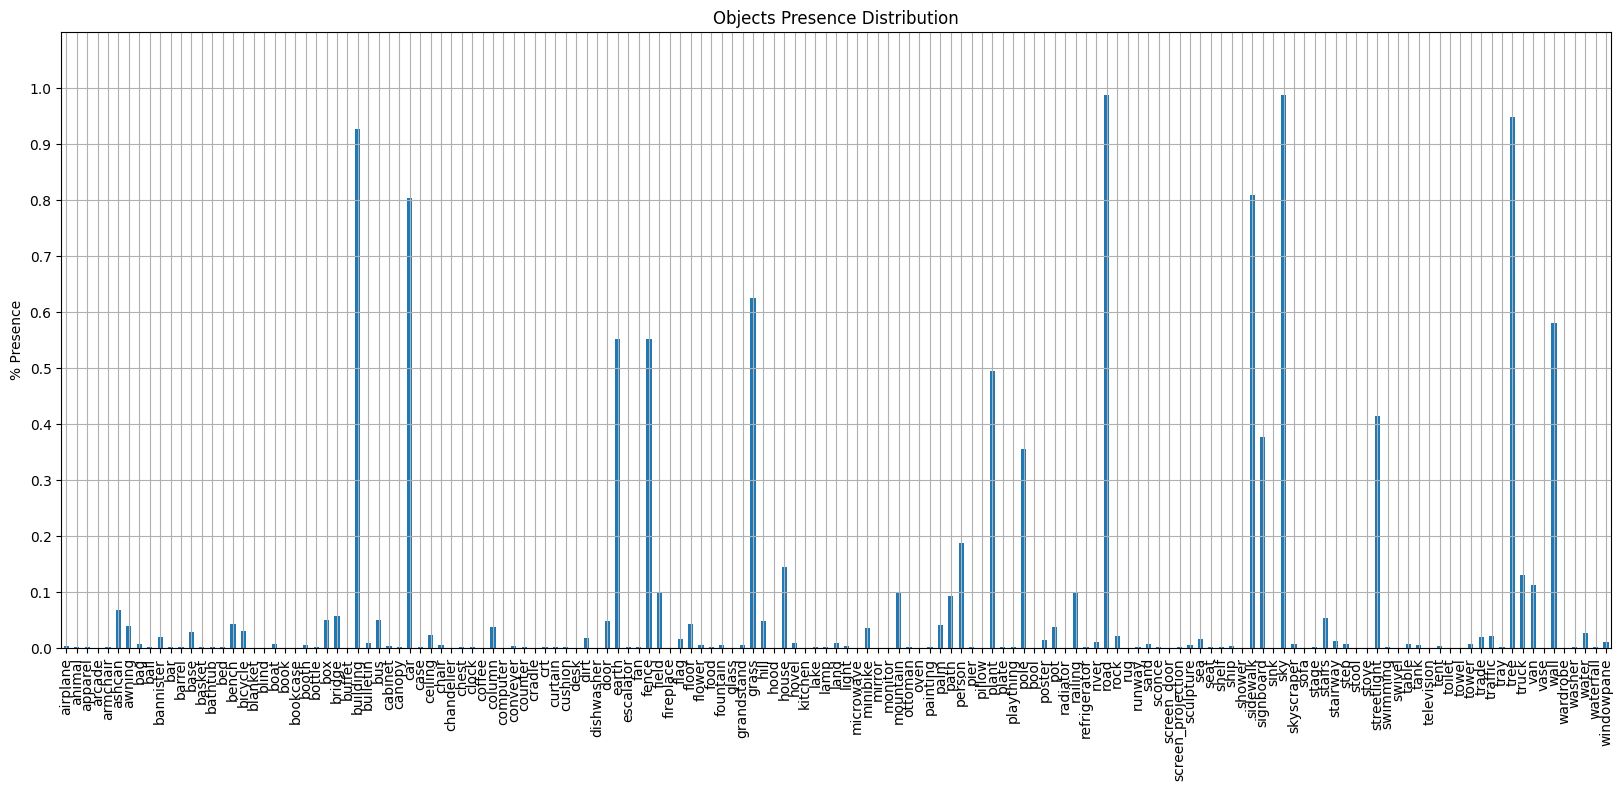

In [15]:
sum_df = features_df.sum()/len(city_df)

ax = sum_df.plot(kind="bar", figsize=(20,8), ylabel="% Presence", rot=90, ylim=(0.0,1.1), yticks=list(np.arange(0,1.1,0.10)))
plt.title(f"Objects Presence Distribution")
plt.grid(True)
plt.show()
# plt.savefig(f"{MAIN_OUT_PATH}objects_distribution.png", bbox_inches='tight', pad_inches = 0.5)
# plt.clf()
# plt.cla()
# plt.close()

In [16]:
keep_features_indices = sum_df[sum_df>0.1].index.values
len(keep_features_indices), keep_features_indices

(19,
 array(['building', 'car', 'earth', 'fence', 'grass', 'house', 'mountain',
        'person', 'plant', 'pole', 'road', 'sidewalk', 'signboard', 'sky',
        'streetlight', 'tree', 'truck', 'van', 'wall'], dtype=object))

In [17]:
normalized_features = (features_df[keep_features_indices] ).copy()
normalized_features

,building,car,earth,fence,grass,house,mountain,person,plant,pole,road,sidewalk,signboard,sky,streetlight,tree,truck,van,wall
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110983,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
110984,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
110985,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
110986,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [18]:
indeces = ["image_file_name"]
indeces.extend(keep_features_indices)
indeces.extend(["perception", "label", "city", "image_path"])

In [19]:
opf_df = city_df[indeces].copy()
# opf_df.iloc[:, 1:-4] = X_df[keep_features_indices].copy()
opf_df

,image_file_name,building,car,earth,fence,grass,house,mountain,person,plant,...,sky,streetlight,tree,truck,van,wall,perception,label,city,image_path
0,513cc058fdc9f0358700137e,4.187520,2.078247,12.711589,0.072734,0.000000,0.000000,0.000000,0.000000,0.000000,...,43.906657,0.461324,5.482992,0.58492,0.831604,0.000000,2.520084,0,Houston,data/PlacePulse_2//images//Houston/29.740200_-...
1,513cc646fdc9f03587001930,0.015767,0.017293,6.755066,0.006104,4.382324,0.011698,0.000000,0.000000,0.000000,...,31.339518,0.000000,23.216248,0.00000,0.000000,0.000000,3.333333,0,Houston,data/PlacePulse_2//images//Houston/29.658276_-...
2,513d35bffdc9f03587002b1e,4.181417,0.000000,0.000000,0.000000,18.264771,0.000000,0.000000,0.000000,0.073751,...,42.042542,0.517273,7.662964,0.00000,0.000000,0.000000,3.333333,0,Houston,data/PlacePulse_2//images//Houston/29.660180_-...
3,513cc072fdc9f0358700139b,1.689148,0.000000,0.211589,0.001017,4.818726,0.000000,0.000000,0.000000,0.000000,...,43.962606,0.000000,6.894430,0.00000,0.000000,0.000000,5.634921,1,Houston,data/PlacePulse_2//images//Houston/29.660599_-...
4,513cc0eafdc9f03587001413,0.000000,0.752258,0.000000,0.000000,5.619812,0.000000,0.000000,0.000000,0.000000,...,48.340352,0.020854,2.666219,0.00000,0.000000,0.000000,4.811105,1,Houston,data/PlacePulse_2//images//Houston/29.661336_-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110983,5140b899fdc9f04926001ca5,0.699870,0.000000,0.188700,0.000000,0.081889,0.000000,0.983683,0.000000,0.000000,...,42.807007,0.000000,10.089620,0.00000,0.000000,0.000000,4.373219,1,Zagreb,data/PlacePulse_2//images//Zagreb/45.843234_16...
110984,5140b75efdc9f049260019a9,5.694580,12.957764,5.160014,0.000000,5.682373,1.736450,0.000000,0.000000,0.691223,...,29.054769,0.172933,14.404806,0.00000,0.000000,0.000000,3.333333,0,Zagreb,data/PlacePulse_2//images//Zagreb/45.844200_16...
110985,5140b909fdc9f04926001d7d,9.884135,0.000000,0.034587,12.675476,5.847168,1.150004,0.000000,0.000000,5.815633,...,34.589640,0.000000,12.540181,0.00000,0.000000,0.348918,5.017316,1,Zagreb,data/PlacePulse_2//images//Zagreb/45.844303_16...
110986,5140b8b6fdc9f04926001cdc,20.867920,0.000000,0.773112,12.282308,16.357931,0.000000,0.000000,0.010681,0.025940,...,31.451925,0.000000,9.117635,0.00000,0.000000,0.436910,5.211386,1,Zagreb,data/PlacePulse_2//images//Zagreb/45.844791_16...


In [20]:
opf_df.iloc[:, 1:-4].sum()/len(opf_df)

building       13.553064
car             3.193109
earth           2.069011
fence           1.196193
grass           3.305462
house           0.264995
mountain        0.088227
person          0.071964
plant           1.105782
pole            0.193175
road           26.658191
sidewalk        2.829880
signboard       0.161306
sky            24.698304
streetlight     0.061694
tree           16.775541
truck           0.177820
van             0.124564
wall            1.735493
dtype: float64

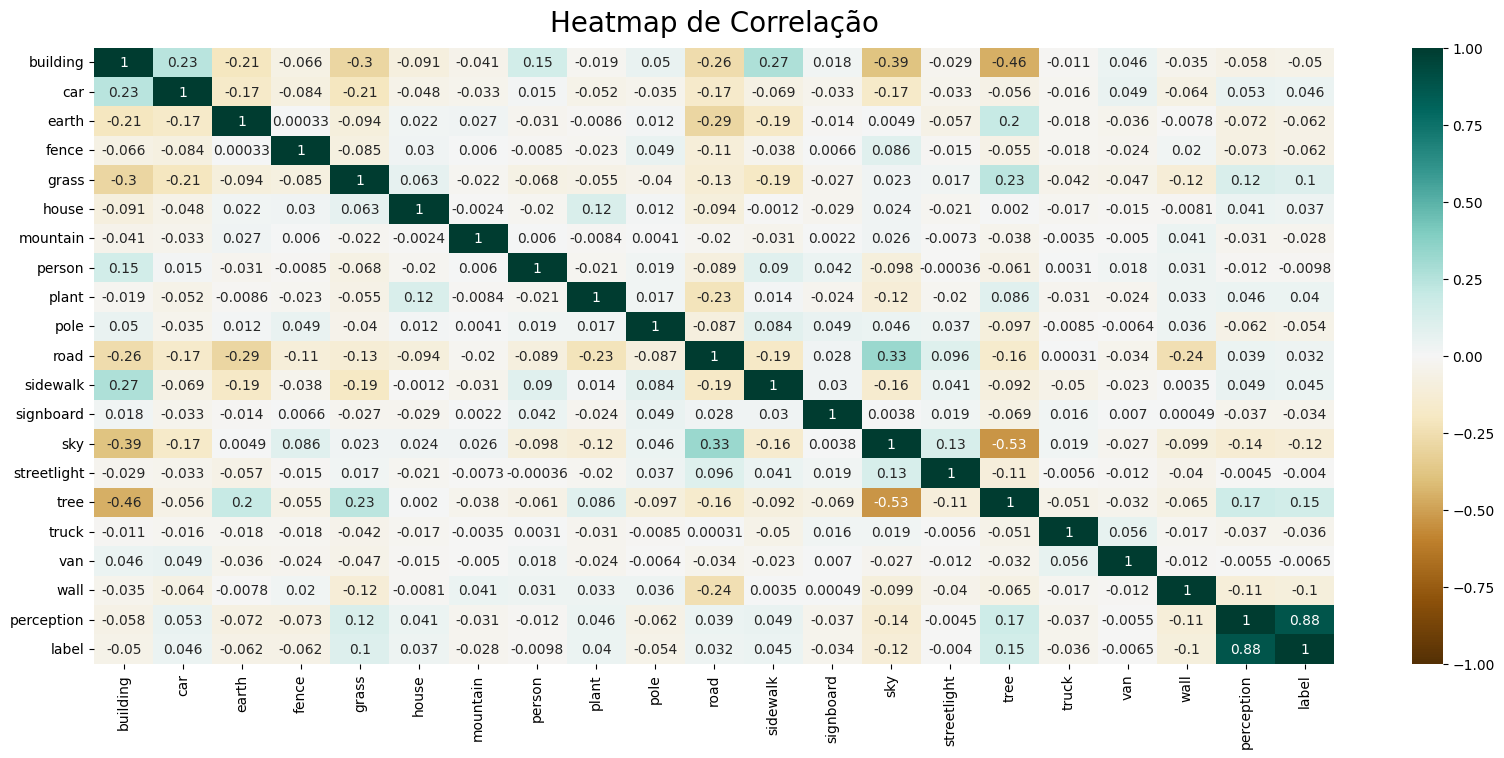

In [21]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(opf_df.iloc[:, 1:-2].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Heatmap de Correlação', fontdict={'fontsize':20}, pad=12);

### Creating data

In [28]:
data_dict = {
    "id": opf_df["image_file_name"].values.tolist(),
    "city": opf_df["city"].values.tolist(),
    "features": opf_df.iloc[:, 1:-4].values.tolist(),
    "features_name": opf_df.iloc[:, 1:-4].values.tolist(),
    "safety": opf_df["perception"].values.tolist(),
    "label": opf_df["label"].values.tolist(),
    "path": opf_df["image_path"].values.tolist(),
}

In [29]:
# data_dict["images"] = []
# for index, row in tqdm(opf_df.iterrows()):
#     np_image = np.array(Image.open(row["image_path"]))
#     image_reshape = np.moveaxis(np_image, -1, 0)
#     data_dict["images"].append(image_reshape)

#     #features = row[ 1:-4].copy().to_list()
#     #data_dict["features"].append(features)
    
#     #data_dict["id"].append(row["image_file_name"])
#     #data_dict["safety"].append(row["safety"])
#     #data_dict["label"].append(row["label"])
#     #data_dict["path"].append(row["image_path"])


In [30]:
joblib.dump(data_dict, f"{MAIN_OUT_PATH}/static/data.joblib")

['outputs//static/data.joblib']